## 6.5 WH Clustering

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data preprocessing
#### 3. Applying the elbow technique
#### 4. k-means clustering

### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Option to ensure the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'/Users/giadairene/Documents/CareerFoundry Data Analytics/Data Analytics Immersion/Achievement 6/World_Happiness_Analysis'

In [4]:
# Import world happiness data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Happiness_combined_all_years.csv'), index_col = 0)

In [5]:
df.shape

(741, 11)

In [6]:
df.head()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
0,Finland,Western Europe,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### 2. Data preprocessing

##### Handling missing values

In [7]:
# Check for missing values

df.isnull().sum()

Country                  0
Region                   0
Year                     0
Happiness_rank           0
Happiness_score          0
GDP_capita               0
Social_support           0
Life_expectancy          1
Freedom                  0
Generosity               0
Corruption_perception    0
dtype: int64

In [8]:
# Impute missing values with median

df['Life_expectancy'].fillna(df['Life_expectancy'].median(), inplace=True)

##### Removing categorical variables

In [9]:
df = df.drop(columns=['Country', 'Region', 'Year', 'Happiness_rank'])

In [10]:
df.shape

(741, 7)

### 3. Applying the elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [12]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Rate of variation for the given cluster option

score

[-1226.6610510089229,
 -503.6829113627622,
 -351.64793500484313,
 -267.66856717121675,
 -228.11230577720465,
 -208.75163259490023,
 -191.37559751429126,
 -177.51069295780445,
 -167.09381180182694]

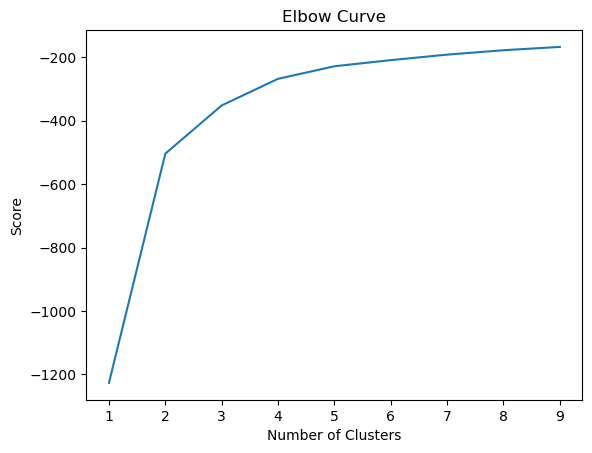

In [13]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Comment:
There's a large jump from 2 to 4 on the x-axis, after that the curve starts straightening out. This means that the optimal count for the clusters is 4.

### 4. k-means clustering

In [14]:
# Create the k-means object

kmeans = KMeans(n_clusters = 4) 

In [15]:
# Fit the k-means object to the data

kmeans.fit(df)

KMeans(n_clusters=4)

In [16]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs

df['clusters'] = kmeans.fit_predict(df)

In [17]:
df.head()

,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception,clusters
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,3
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410,3
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118,3
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298,3


In [18]:
# Check observations frequency

df['clusters'].value_counts()

clusters
1    271
2    242
3    140
0     88
Name: count, dtype: int64

In [26]:
# Export the dataset with clusters

df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Clusters.csv'))

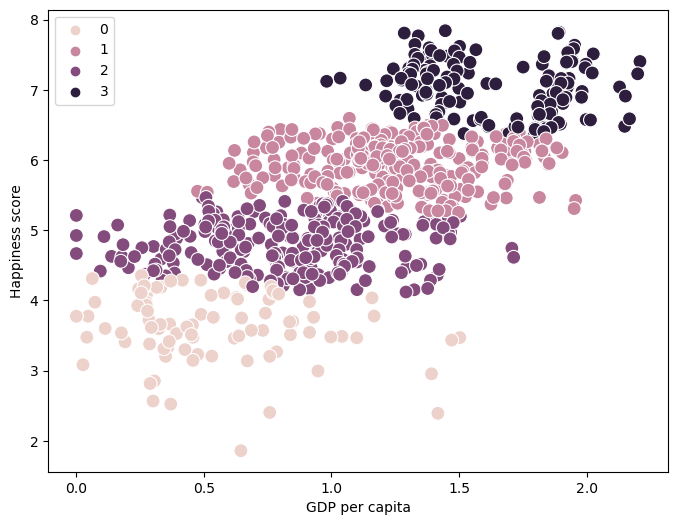

In [19]:
# Plot the clusters for the "Happiness_score" and "GDP_capita" variables

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df['GDP_capita'], y=df['Happiness_score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('GDP per capita') 
plt.ylabel('Happiness score') 
plt.show()

#### Comment:
* The first cluster, in pink (coded as “0” in the legend), is the most spreaded cluster. It gathers the data points with the lowest GDP per capita and the lowest happiness scores. The points are quite dispersed horizontally,  showing some variability in GDP values but still maintaining the lowest happiness scores overall.
* The second cluster, in purple (coded as “2” in the legend), includes data points with low-medium GDP per capita and low happiness scores. The tight clustering suggests that low GDP is a strong predictor of low happiness, with little variability in happiness scores within this economic range.
* The third cluster, in dark pink (coded as “1” in the legend), gathers data points with a medium-high GDP per capita and intermediate to high happiness scores. These points form the central bulk of the data, suggesting a general trend where moderate economic prosperity correlates with moderate happiness. The spread of this cluster indicates little variability in happiness within similar GDP ranges.
* The last cluster is the one in dark purple (coded as “3” in the legend). Data points in this cluster have the highest GDP per capita and the highest happiness scores. This cluster illustrates that higher economic prosperity tends to correlate with higher happiness. The points are more spread out horizontally, showing some variability in GDP values but still maintaining the highest happiness scores overall.
* **1.5 seems to be the treshold value** over which a country scores the highest happiness.
* **The clustering in this scatterplot makes sense because it aligns with the general understanding that higher economic prosperity (as measured by GDP per capita) tends to be associated with higher happiness scores.** 

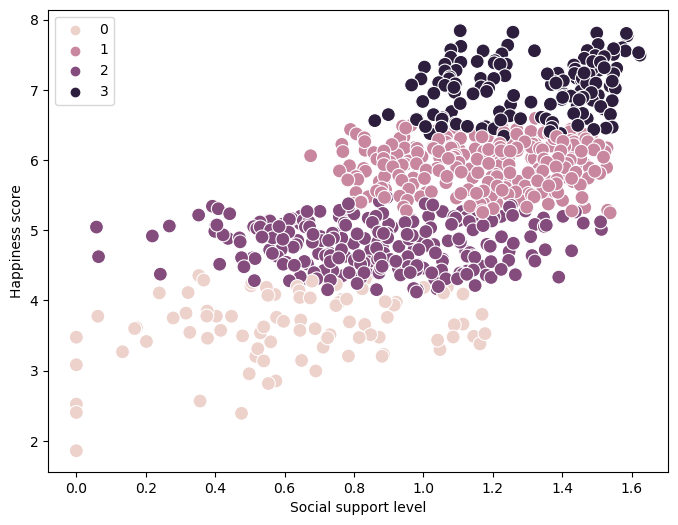

In [20]:
# Plot the clusters for the "Social_support" and "Happiness_score" variables

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df['Social_support'], y=df['Happiness_score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Social support level') 
plt.ylabel('Happiness score') 
plt.show()

#### Comment:
* Cluster 0 (pink): lowest happiness scores (under 4.5) and much variability in social support values (but under 1.2), still maintaining the lowest happiness scores overall.
* Cluster 2 (purple): low-medium happiness scores (under 5.5) and some variability in social support values (0.4-1.4 excluding some outliers). The cluster is densely packed, reinforcing the correlation between lower social support and lower happiness.
* Cluster 1 (dark pink): medium-high happiness scores (5.5-6.5) with less variability in social support values (0.8-1.6) compared to the previous clusters. The cluster is densely packed, reinforcing the correlation between higher social support and higher happiness.
* Cluster 3 (dark purple): highest happiness scores (over 6.5) with less variability in social support values (1.0-1.6) compared to the previous clusters. The spread of points shows that while high social support generally correlates with higher happiness, there is still some variability in happiness scores at these support levels.
* **The clustering in this scatterplot makes sense because it reflects the commonly understood relationship between social support and happiness, although the high variability in social support values in the bottom clusters remain unexplained.**

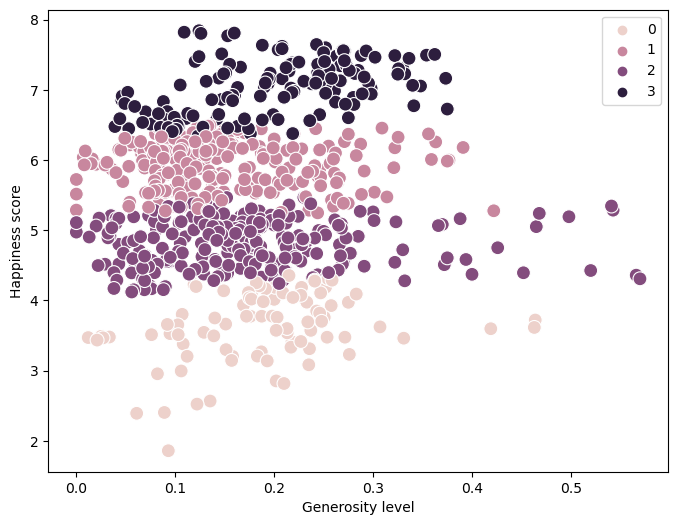

In [21]:
# Plot the clusters for the "Generosity" and "Happiness_score" variables

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df['Generosity'], y=df['Happiness_score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Generosity level') 
plt.ylabel('Happiness score') 
plt.show()

#### Comment:
* There is no visible linear connection between these variables.
* Cluster 0 (pink): represents the lowest happiness scores. Generosity level is widely spreaded, with a higher concentration of data points between 0.1-0.3.
* Cluster 2 (purple): higher happiness scores compared to the previous cluster, similar variability in generosity values.
* Cluster 1 (dark pink): again higher happiness scores compared to the previous cluster, high density of generosity values between 0.0-0.3.
* Cluster 3 (dark purple): represents the highest happiness scores. Similar variability in generosity values compared to the previous cluster.
* In general, **generosity level doesn't seem to relevantly affect happiness scores.** 
* Generosity level spans between 0.0-0.6, while other variables have a wider range of values. The generosity level of the interviewed people seem to be low in general.

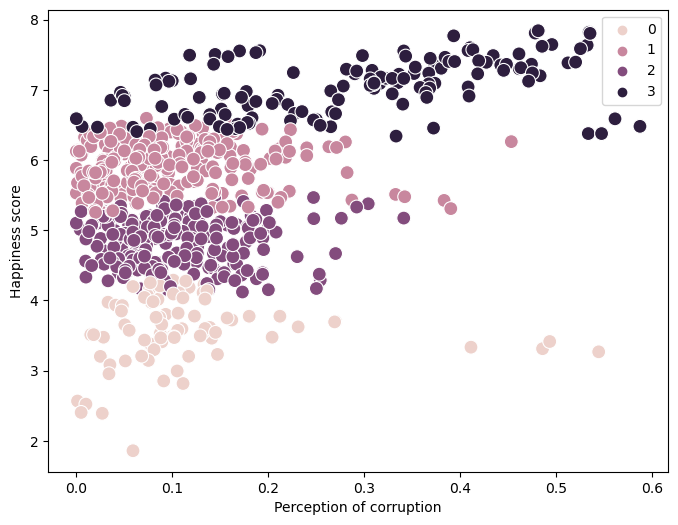

In [22]:
# Plot the clusters for the "Corruption_perception" and "Happiness_score" variables

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df['Corruption_perception'], y=df['Happiness_score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Perception of corruption') 
plt.ylabel('Happiness score') 
plt.show()

#### Comment:
* There is no visible linear connection between these variables.
* Cluster 0 (pink): represents the lowest happiness scores. Perception of curroption has a high concentration of data points between 0.0-0.3 (with the exclusion of some extreme values).
* Cluster 2 (purple): higher happiness scores compared to the previous cluster, similar variability in perception of corruption values. Very dense cluster.
* Cluster 1 (dark pink): again higher happiness scores compared to the previous cluster, and similar variability in perception of corruption values. Again very dense cluster.
* Cluster 3 (dark purple): represents the highest happiness scores. Data points are widely horizontally spreaded, meaning that there is a high variability in the happiest people's perception of corruption.
* It is interesting to notice how **the highest perception of corruption values are registered only by extremely happy or unhappy people.**
* Perception of corruption spans between 0.0-0.6, while other variables have a wider range of values. The corruption perception of the interviewed people seem to be low in general.

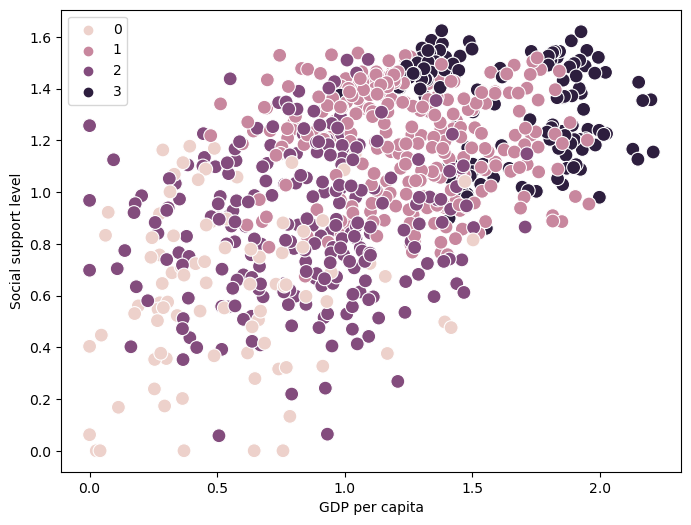

In [23]:
# Plot the clusters for the "Social_support" and "Happiness_score" variables

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df['GDP_capita'], y=df['Social_support'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('GDP per capita') 
plt.ylabel('Social support level') 
plt.show()

#### Comment:
Even though the data points are widely dispersed, it is still possible to observe a positive correlation between the two variables. This is confirmed by the fact that most of the data points corresponding to the highest GDP per capita (>1.5) belong to the highest social support level (>1.4). These data points mainly belong to cluster 3 (dark purple).

In [24]:
# Assign colours to clusters

df.loc[df['clusters'] == 1, 'cluster'] = 'dark pink'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'

In [25]:
df.groupby('cluster').agg({'GDP_capita':['mean', 'median'], 
                           'Social_support':['mean', 'median'], 
                           'Life_expectancy':['mean', 'median'],
                           'Freedom':['mean', 'median'],
                           'Generosity':['mean', 'median'],
                           'Corruption_perception': ['mean', 'median'],
                           'Happiness_score': ['mean', 'median']})

GDP_capita           Social_support           Life_expectancy  \
                  mean    median           mean    median            mean   
cluster                                                                     
dark pink     1.251274  1.241000       1.192021  1.219000        0.683658   
dark purple   1.631509  1.585500       1.314194  1.369272        0.773560   
pink          0.541456  0.457082       0.623645  0.643000        0.310064   
purple        0.839873  0.887616       0.877431  0.874000        0.461835   

                        Freedom           Generosity            \
               median      mean    median       mean    median   
cluster                                                          
dark pink    0.680446  0.508906  0.535000   0.145630  0.126000   
dark purple  0.778000  0.613595  0.630500   0.199474  0.206000   
pink         0.299000  0.345792  0.368500   0.188550  0.192095   
purple       0.443000  0.420355  0.424428   0.174434  0.164699   

            Corruption_perception         Happiness_score          
                             mean  median            mean  median  
cluster                                                            
dark pink                0.094869  0.0770        5.926006  5.9532  
dark purple              0.282612  0.2950        7.038427  7.0724  
pink                     0.114950  0.0900        3.626545  3.6554  
purple                   0.101591  0.0885        4.812464  4.8502

#### Interpretation of descriptive statistics:
* The dark purple cluster has the best stats in almost all categories. The median value of GDP per capita for this category is 1.59, which is significantly larger than the other three. It also has the highest levels of happiness, social support, life expectancy and freedom, and surprisingly also the highest level of corruption perception.
* Generosity doesn’t seem to matter much. The best-rated cluster (dark purple) has an almost equal median value than the worst cluster (pink).
* In a similar way, corruption perception doesn't play a big role. It is worth to notice that the best-rated cluster (dark purple) is the one with the highest median value of them all. The other values differ from each other only slightly. 
* A general tendency is observed, where higher values of each variable - except for generosity and corruption perception - correspond to higher happiness scores. This makes sense as it reflects common understanding of how happiness is determined.

### Proposed future steps of an analytics pipeline:

#### The data could be divided into categories based on GDP per capita, such as “Countries with low GDP”, “Countries with medium-low GDP”, “Countries with middle GDP” and “Countries with high GDP”. A classification algorithm could then be used to predict happiness scores, combining unsupervised with supervised machine learning.